In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


## Clone the repository (or not)

In [ ]:
# !git clone https://github.com/acse-jy220/SFC-CAE-Ready-to-use

In [ ]:
%cd gdrive/MyDrive/DISSERTATION/SFC-CAE-AdaptiveFinal/

/content/gdrive/MyDrive/DISSERTATION/SFC-CAE-AdaptiveFinal


In [ ]:
# !git pull

### Install dependencies (if they aren't already installed)

In [ ]:
modulelist = !pip list                         #This is just to check whether the requirements are already installed
if str(modulelist).find("vtk") == -1:          #If vtk is already installed don't start the installation process because it will take a couple minutes to verify that everything is there.
  !pip install -e .

Obtaining file:///content/gdrive/MyDrive/DISSERTATION/SFC-CAE-AdaptiveFinal
     |████████████████████████████████| 59.5 MB 42 kB/s 
     |████████████████████████████████| 163 kB 40.4 MB/s 
     |████████████████████████████████| 223 kB 25.1 MB/s 
     |████████████████████████████████| 1.1 MB 40.5 MB/s 
     |████████████████████████████████| 1.7 MB 44.1 MB/s 
     |████████████████████████████████| 3.7 MB 47.8 MB/s 
     |████████████████████████████████| 83 kB 2.2 MB/s 
     |████████████████████████████████| 1.8 MB 43.0 MB/s 
     |████████████████████████████████| 495 kB 40.3 MB/s 
     |████████████████████████████████| 3.1 MB 44.2 MB/s 
     |████████████████████████████████| 3.0 MB 33.9 MB/s 
     |████████████████████████████████| 74 kB 2.1 MB/s 
     |████████████████████████████████| 251 kB 35.7 MB/s 
     |████████████████████████████████| 133 kB 51.5 MB/s 
     |████████████████████████████████| 97 kB 7.1 MB/s 
     |████████████████████████████████| 170 kB 51.2 MB/s 
   

### Import the module



In [ ]:
from sfc_cae import *



```
# This is formatted as code
```

### Problem specifications (equation, variables, conditions)
<br>

The PDE equation for two-dimension (2D) advection problem can be written as:
$$\frac{\partial c}{\partial t} = - U\frac{\partial c}{\partial x} - V\frac{\partial c}{\partial y}, $$

where we have the following variables:

$t$: time.<br>
$x$: our $1_\text{st}$ space dimension.<br>
$y$: our $2_\text{nd}$ space dimension.<br>
$c$: concentration of some quantity depend on $t$ and $x$, can be denoted as $c(t, x)$.<br>
<br>

as well as two scalar constants: <br>

$U$: $1_\text{st}$ component of advection velocity <br>
$V$: $2_\text{nd}$ component of advection velocity <br>

## An analytical solution

As for time-stepping, we use a peseudo analytical solution (assuming the concentration block only moves, no diffusion at all):

$$
c(x, y, t) = c_0(x - Ut, y - Vt)
$$
where
$$
c_0(x, y) = c(x, y, 0)
$$

</div>

## Initial condition

$$
c^{0}(x, y) = 
\left\{ 
\begin{aligned} 
1 &, \;\; (x, y) \in [x_0 - \frac{d}{2}, x_0 + \frac{d}{2}] \times [y_0 -  \frac{d}{2}, y_0 +  \frac{d}{2}]\\
0 &, \;\; \text{otherwise}
\end{aligned}\right.
$$

where $d$ is the size of the block.


### Generate simulations

#### initialise model 

In [ ]:
# # advection block
# simulation = run_simulation_advection()
# advection gaussian
# simulation = run_simulation_advection(init_func = sinusoidal_disturbance)

#### Simulation outputs (run 500 simulations)

In [ ]:
# !mkdir -p ../advection_block_128
# %cd ../advection_block_128

##### The following code takes 20 minutes:

In [ ]:
# simulation.clear_run_times()
# simulation_nums = 500
# cnt_progress = 0
# bar=progressbar.ProgressBar(maxval=simulation_nums)
# for i in range (simulation_nums):
#     cnt_progress += 1
#     simulation()
#     simulation.output_snapshots()
#     bar.update(cnt_progress)
# bar.finish()

###### zip the data for further use, try to specify your own directory

In [ ]:
# !zip -r /content/advection_block_128.zip output/*

Unzip advection_block data, taking 3 miniutes:

In [ ]:
# os.chdir('/content/')
# !unzip advection_block_128.zip

### Load tensors

In [ ]:
# DATADIR = './savedtensors'
# simulaion_steps = simulation.steps # default is 40
# total_num = 500

#### Load tensor from `txt` files (take 20 minutes)

In [ ]:
# train_ratio = 0.8
# valid_ratio = 0.1
# test_ratio = 0.1
# train_index, valid_index, test_index = index_split(train_ratio, valid_ratio, test_ratio, total_num = total_num)

In [ ]:
# train_set = load_tensor(DATADIR, simulaion_steps, train_index)
# valid_set = load_tensor(DATADIR, simulaion_steps, valid_index)
# test_set = load_tensor(DATADIR, simulaion_steps, test_index)

### Save tensor if you want to reuse:

In [ ]:
# torch.save(train_set, '/content/gdrive/MyDrive/train_tensor_block_128.pt')
# torch.save(valid_set, '/content/gdrive/MyDrive/valid_tensor_block_128.pt')
# torch.save(test_set, '/content/gdrive/MyDrive/test_tensor_block_128.pt')

Or download premade ones from the mega link in the readme

Load tensor

In [ ]:
train_set = torch.load('./savedtensors/train_tensor_advecting_block.pt', map_location=torch.device('cpu')).float()
valid_set = torch.load('./savedtensors/valid_tensor_advecting_block.pt', map_location=torch.device('cpu')).float()
test_set = torch.load('./savedtensors/test_tensor_advecting_block.pt', map_location=torch.device('cpu')).float()

# Structured mesh

This is how the simulation and tensors are interfaced

In [ ]:
# simulation = run_simulation_advection()
# def get_simulation_index(num, simulation):
#     return np.arange(num * (simulation.steps + 1), (num + 1) * (simulation.steps + 1))

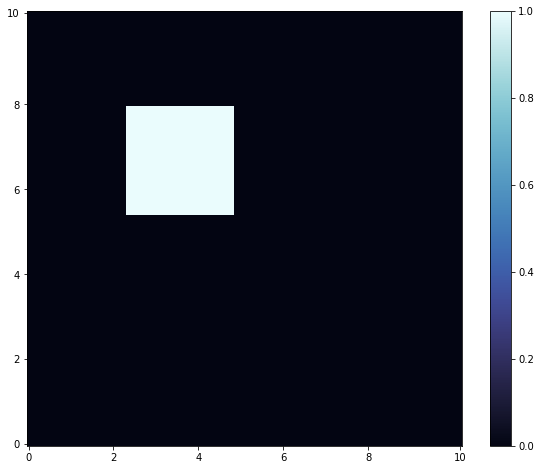

In [ ]:
simulation.full_stage = np.array(test_set[get_simulation_index(45, simulation), :])
anim = simulation.generate_anime()
# save animation
# anim.save('../original_simulation.mp4')

In [ ]:
# view animation
HTML(anim.to_jshtml())

Define a few parameters for the dataloader

In [ ]:
size = 128
batch_size = 64
seed = 41
valid_batch_size = 1000

In [ ]:
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(dataset=valid_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True)

### Let's generate the space filling curves.

In [ ]:
# space_filling_orderings, invert_space_filling_orderings = get_MFT_RNN_curves_structured(size, 4000) #Warning: 4000 will take 5 or 6 hours.

In [ ]:
# #You should probably clean them of duplicates:

# nonduplicates = []


# for i in range(len(space_filling_orderings)):

#   duplicate = False

#   for j in range(len(nonduplicates)):
#     if np.diff(space_filling_orderings[i],nonduplicates[j]) == 0:
#       duplicate = True
  
#   if not duplicate:
#     nonduplicates.append(space_filling_orderings[i])

# space_filling_orderings = nonduplicates

In [ ]:
# #And regenerate the inverted space filling curves:
# invert_space_filling_orderings = [np.argsort(i) for i in nonduplicates]

Or just download premade ones from the mega link in the readme

In [ ]:
# # We pickle them for further use

# import pickle

# outfile = open("./savedcurves/"+str(len(space_filling_orderings))+"curves.sf",'wb')
# pickle.dump(space_filling_orderings,outfile)
# outfile.close()

# outfile = open("./savedcurves/"+str(len(invert_space_filling_orderings))+"icurves.sf",'wb')
# pickle.dump(invert_space_filling_orderings,outfile)
# outfile.close()


In [ ]:
#And then we load them
import pickle

infile = open("./savedcurves/512curves.sf",'rb')
space_filling_orderings = pickle.load(infile)
infile.close()

infile = open("./savedcurves/512icurves.sf",'rb')
invert_space_filling_orderings = pickle.load(infile)
infile.close()

#### Visualize

In [ ]:
# plot_trace_structured_2D(space_filling_orderings[0], 16)

In [ ]:
# plot_trace_structured_2D(space_filling_orderings[1], 16)

In [ ]:
# plot_contour_structured_2D(space_filling_orderings[0])

In [ ]:
# plot_contour_structured_2D(space_filling_orderings[1])

#### Re-initialize the Autoencoder

Create Coordinates

In [ ]:
nx, ny = (128, 128)
x = np.linspace(0, 10, nx)
y = np.linspace(0, 10, ny)
xv, yv= np.meshgrid(x, y)
coords = np.zeros((128*128,3))
coords[:,0] = xv.flatten()
coords[:,1] = yv.flatten()
coords = torch.Tensor(coords).permute(1,0)[:2,:].mul(0.1).to("cuda")

Split the curves into training and validation

In [ ]:
train_ratio = 0.95
valid_ratio = 0.05
test_ratio = 0.0
train_index, valid_index, test_index = index_split(train_ratio, valid_ratio, test_ratio, total_num = len(space_filling_orderings))

In [ ]:
trainsfcs = [space_filling_orderings[i] for i in train_index-1]
trainisfcs = [invert_space_filling_orderings[i] for i in train_index-1]
validisfcs = [space_filling_orderings[i] for i in valid_index-1]
validisfcs = [invert_space_filling_orderings[i] for i in valid_index-1]

In [ ]:
input_size = 128**2
dimension = 2
components = 1
self_concat = 1
structured = True
nearest_neighbouring = True #True # shut down this may lead to a slightly poorer performance, but a quicker training spped
dims_latent = 64
activation = nn.Tanh()
variational = False

In [ ]:
#Create autoencoder 
autoencoder = SFC_CAE(input_size,
                                dimension,
                                components,
                                structured,
                                self_concat,
                                True,
                                dims_latent,
                                space_filling_orderings[:1], 
                                invert_space_filling_orderings[:1],               #Only one space filling curve is supplied here
                                variational = variational,
                                force_initialising_param = None,
                                nfclayers = 3,                                    #Number of fully connected layers
                                verbose = False,                                  #Verbose option shows inner workings
                                coords = coords,                                  #Coords need to be supplied for coption>0
                                coption = 2,                                      #Coption = 2 means the layers will be fed the difference (or distance) between nodes and their neighbours
                                coordslayers = [1,2],                             #Coordinates will be fed to the first and last two layers
                                smoothinglayers = [[(8,33)],[(32,33),(16,31)]])   #Smoothing layers with 8 channels, kernel_size = 33 
    

In [ ]:
# Train
autoencoder = train_model(autoencoder, 
                        train_loader = train_loader,
                        valid_loader = valid_loader,
                        test_loader = test_loader,
                        n_epochs =200, 
                        lr = 1e-4, 
                        seed = seed,
                        shuffle = True,
                        sfcstoshuffle = space_filling_orderings[:-12],          #We train on 500 curves
                        isfcstoshuffle = invert_space_filling_orderings[:-12],
                        changevalid = True,
                        validsfcs = space_filling_orderings[-12:],
                        validisfcs = invert_space_filling_orderings[-12:],      #And validate on the remaining 12
                        visualize = True,
                        wandbopt = False,
                        save_path = "paramoptmodels/")

In [ ]:
test_out = autoencoder.to('cuda')(test_set[1000:].to("cuda"))

In [ ]:
get_simulation_index(45, simulation)

In [ ]:
# simulation.full_stage = test_out[get_simulation_index(45, simulation), :].cpu().detach().numpy()
simulation.full_stage = test_out[get_simulation_index(45, simulation)-1000, :].cpu().detach().numpy()
anim = simulation.generate_anime()
anim.save('../reconstrcuted_2_MFTRNN_NN_latent_8.mp4')

In [ ]:
# view reconstucted animation
HTML(anim.to_jshtml())